(1e-16, 1)

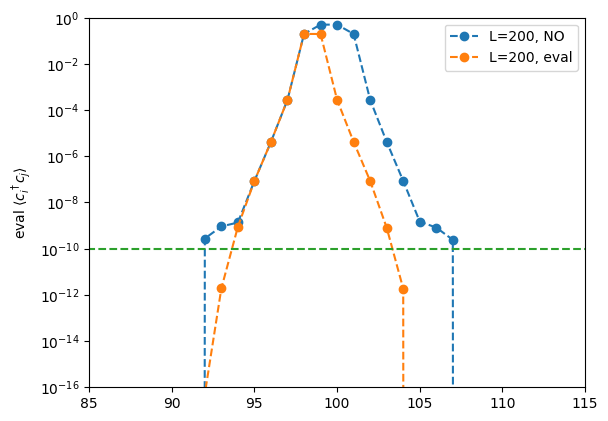

In [13]:
import matplotlib.pyplot as plt
import numpy as np


plt.ylabel('eval $ \\langle c_i^\dagger c_j \\rangle$')
plt.yscale('log')

L=200
cc=np.loadtxt(f"tdvp_no5d/L{L}/cc_L{L}_gs2a.txt")
eval=np.linalg.eigvalsh(cc[2:,2:])
#plt.plot([min(x,1-x) for x in np.sort(cc.diagonal())], '--o', label=f'L={L}, star')
#plt.plot([min(x,1-x) for x in eval], '--o', label=f'L={L}, eval star')
cc=np.loadtxt(f"tdvp_no5d/L{L}/cc_L{L}_gs2b.txt")
#plt.plot([min(x,1-x) for x in np.sort(cc.diagonal())], '--o', label=f'L={L}, NO b')
cc=np.loadtxt(f"tdvp_no5d/L{L}/cc_L{L}_gs2.txt")
plt.plot([min(x,1-x) for x in np.sort(cc.diagonal())], '--o', label=f'L={L}, NO')
eval=np.linalg.eigvalsh(cc[2:,2:])
plt.plot([min(x,1-x) for x in eval], '--o', label=f'L={L}, eval')

plt.plot([1e-10 for x in eval], '--')
plt.legend()
plt.xlim(L//2-15,L//2+15)
plt.ylim(1e-16,1)

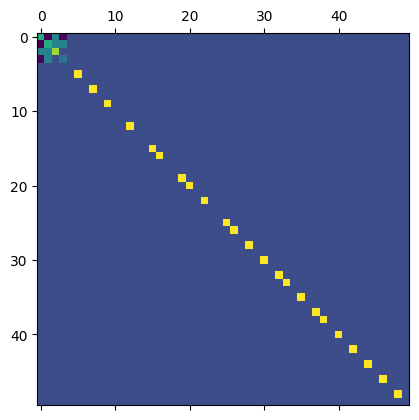

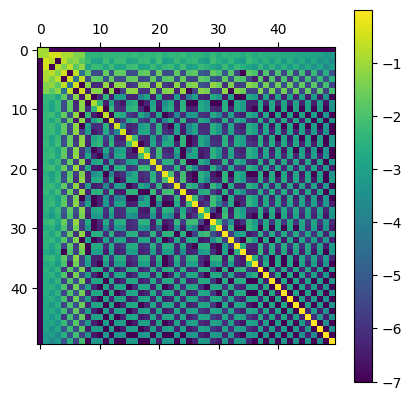

In [23]:
kin=np.loadtxt(f"tdvp_no5d/L{L}/kin_L{L}_NOgs2.txt")
[plt.matshow(cc), plt.matshow(np.log10(np.abs(kin)+1e-7))]
plt.colorbar()

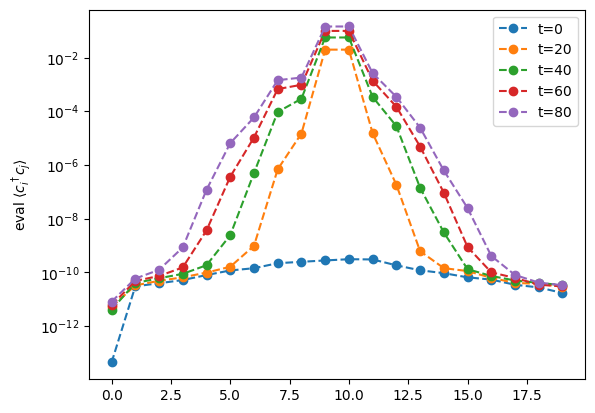

In [14]:
plt.ylabel('eval $ \\langle c_i^\dagger c_j \\rangle$')
plt.yscale('log')
L=20
for t in range(0,100,20):
    eval=np.loadtxt(f"star/L{L}/eval_L{L}_t{t}.txt")
    plt.plot([min(x,1-x) for x in eval], '--o', label=f't={t}')
plt.legend()

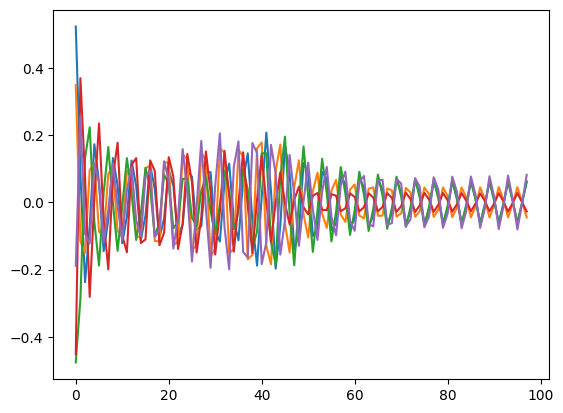

In [70]:
import matplotlib.pyplot as plt
import numpy as np


L=100
for t in [490]:
    orb=np.loadtxt(f"tdvp_no4/L{L}/orb_L{L}_t{t}.txt")[2:,2:]
    for o in range(5):
        plt.plot(orb[:,o])

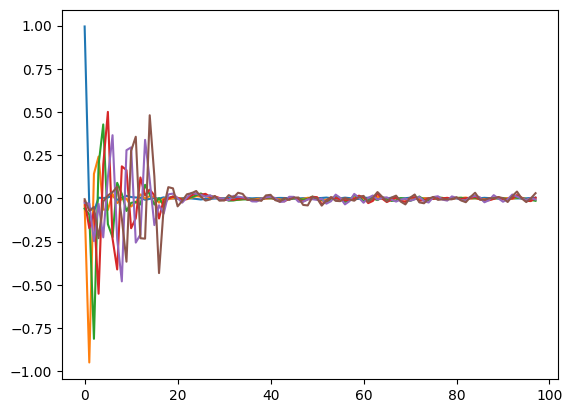

In [69]:
L=100
na=27
for t in [400]:
    orb=np.loadtxt(f"tdvp_no4/L{L}/orb_L{L}_t{t}.txt")[2:,2:]
    J=np.identity(orb.shape[0])
    for i in range(J.shape[0]):
        J[i,i]=i
    X=np.transpose(orb[:,:na])@J@orb[:,:na]
    eval,evec=np.linalg.eigh(X)
    #xsigma=np.transpose(evec@(X.diagonal()-eval)@(X.diagonal()-eval)@evec)
    #print(np.diagonal(xsigma))
    orb2= orb[:,:na]@evec
    for o in range(6):
        plt.plot(orb2[:,o])    

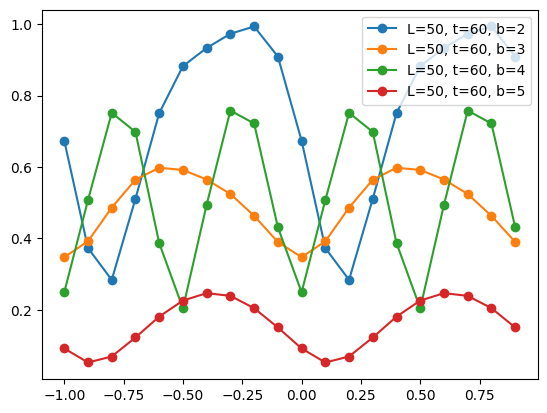

In [78]:
import matplotlib.pyplot as plt
import numpy as np

L=50
for t in [60]:
    for b in [2,3,4,5]:
        s=np.loadtxt(f"tdvp_no4/L{L}/entropy_L{L}_t{t}_b{b}.txt")
        plt.plot(s[:,0]/np.pi,s[:,1],'-o', label=f"L={L}, t={t}, b={b}")
plt.legend(loc=1)

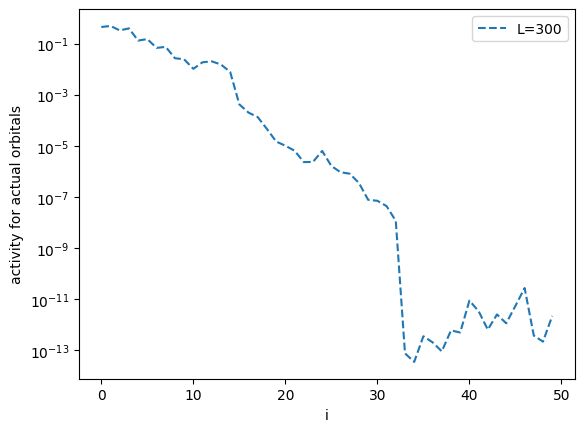

In [65]:
import matplotlib.pyplot as plt
import numpy as np


plt.xlabel('i')
plt.ylabel('activity for actual orbitals')
plt.yscale('log')

for L in [300]:#[100,300,800,1000]:
    cc=np.loadtxt(f"tdvp_no5c/L{L}/cc_L{L}_t200.txt")
    orb=np.loadtxt(f"tdvp_no5c/L{L}/orb_L{L}_t200.txt")
    plt.plot([min(x,1-x) for x in cc.diagonal()[:50]], '--', label=f'L={L}')
plt.legend()

## Real space occupations

25.0
24.999999999999932
25.999999999999915
26.00000000000005


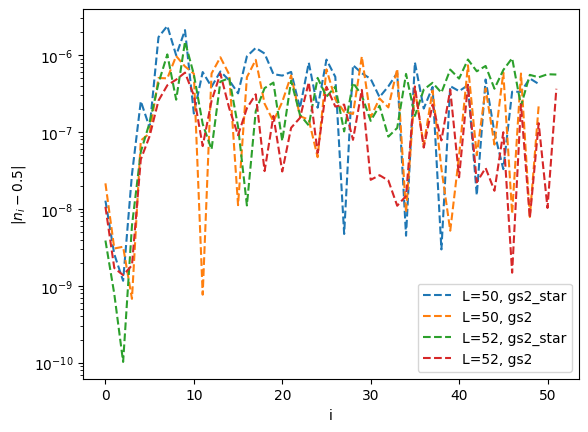

In [153]:
plt.xlabel('i')
plt.ylabel('$|n_i-0.5|$')
plt.yscale('log')
for L in [50,52]:
    for suffix in ["gs2_star","gs2"]:
        cc=np.loadtxt(f"gs_check/L{L}/cc_L{L}_{suffix}.txt")
        orb=np.loadtxt(f"gs_check/L{L}/orb_L{L}_{suffix}.txt")
        ccr = orb @ cc @ orb.T
        plt.plot([abs(x-0.5) for x in ccr.diagonal()[:]], '--', label=f'L={L}, {suffix}')
        print(np.trace(ccr))
plt.legend()

[0.80677703 0.19322299]
[0.19628893 0.80371121]


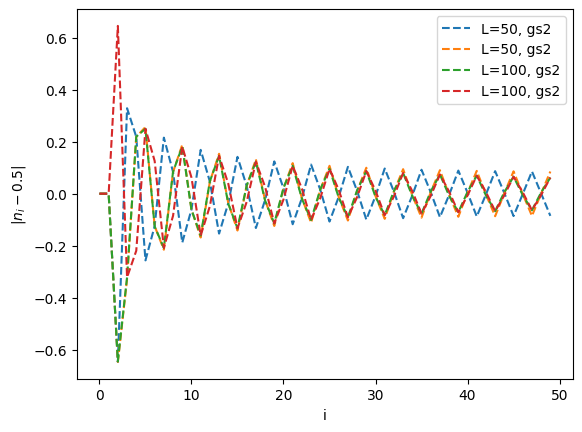

In [149]:
plt.xlabel('i')
plt.ylabel('$|n_i-0.5|$')
#plt.yscale('log')
for L in [50,100]:
    for suffix in ["gs2"]:
        cc=np.loadtxt(f"gs_check/L{L}/cc_L{L}_{suffix}.txt")
        orb=np.loadtxt(f"gs_check/L{L}/orb_L{L}_{suffix}.txt")
        ccr = orb @ cc @ orb.T
        plt.plot(orb[:50,2], '--', label=f'L={L}, {suffix}')
        plt.plot(orb[:50,3], '--', label=f'L={L}, {suffix}')
        print(cc.diagonal()[2:4])
plt.legend()

### Friedel oscillations

[1.         0.         0.5        0.49999999] 25.999999999999993


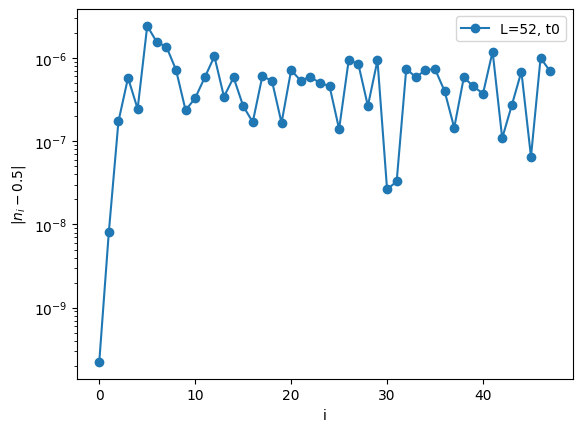

In [162]:
plt.xlabel('i')
plt.ylabel('$|n_i-0.5|$')
plt.yscale('log')
for L in [52]:
    for suffix in ["t0"]:
        cc=np.loadtxt(f"gs_check/L{L}/cc_L{L}_{suffix}.txt")
        orb=np.loadtxt(f"gs_check/L{L}/orb_L{L}_{suffix}.txt")
        ccr = orb @ cc @ orb.T
        print(ccr.diagonal()[0:4],np.trace(ccr))
        plt.plot([abs(x-0.5) for x in ccr.diagonal()[2:50]], 'o-', label=f'L={L}, {suffix}')
plt.legend()